In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression, f_regression,SelectKBest
from sklearn.model_selection import cross_validate
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

In [19]:
from google.colab import drive 
drive.mount('/content/drive')
video_path = "/content/drive/MyDrive/219/transcoding_mesurment.tsv" 
df_video = pd.read_csv(video_path, sep='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68784 non-null  object 
 1   duration     68784 non-null  float64
 2   codec        68784 non-null  object 
 3   width        68784 non-null  int64  
 4   height       68784 non-null  int64  
 5   bitrate      68784 non-null  int64  
 6   framerate    68784 non-null  float64
 7   i            68784 non-null  int64  
 8   p            68784 non-null  int64  
 9   b            68784 non-null  int64  
 10  frames       68784 non-null  int64  
 11  i_size       68784 non-null  int64  
 12  p_size       68784 non-null  int64  
 13  b_size       68784 non-null  int64  
 14  size         68784 non-null  int64  
 15  o_codec      68784 non-null  object 
 16  o_bitrate    68784 non-null  int64  
 17  o_framerate  68784 non-null  float64
 18  o_width      68784 non-null  int64  
 19  o_he

In [ ]:
df_video.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [20]:
(df_video['o_codec']).unique()

array(['mpeg4', 'vp8', 'flv', 'h264'], dtype=object)

In [21]:
(df_video['codec']).unique()

array(['mpeg4', 'h264', 'vp8', 'flv'], dtype=object)

In [22]:
(df_video['o_codec']==df_video['codec']).sum()

17283

In [ ]:
df_video.tail()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
68779,ZWEN-71BqPs,972.27100,h264,480,360,278822,29.000000,560,28580,0,29140,7324628,26561730,0,33886358,flv,242000,24.00,640,480,88692,1.552
68780,zWQN-bqqg0o,129.88100,vp8,640,480,639331,30.162790,36,3855,0,3891,875784,9503846,0,10379630,mpeg4,539000,29.97,1920,1080,107524,18.557
68781,zX17-vi0sqQ,249.68000,vp8,320,240,359345,25.068274,129,6113,0,6242,1758664,9456514,0,11215178,flv,539000,12.00,176,144,88708,0.752
68782,zyiT-TzxIpk,183.62334,h264,1280,720,2847539,29.000000,98,5405,0,5503,5246294,60113035,0,65359329,mpeg4,539000,12.00,320,240,88724,5.444
68783,zZKo-QsY86U,294.61334,mpeg4,176,144,55242,12.000000,61,3474,0,3535,84002,1950409,0,2034411,h264,820000,24.00,176,144,88736,3.076


Q1

In [23]:
df_video = df_video.drop(['id', 'b_size', 'umem'], axis = 1)
df_video

,duration,codec,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,utime
0,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.00,176,144,0.612
1,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.00,320,240,0.980
2,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.00,480,360,1.216
3,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.00,640,480,1.692
4,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.00,1280,720,3.456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,972.27100,h264,480,360,278822,29.000000,560,28580,0,29140,7324628,26561730,33886358,flv,242000,24.00,640,480,1.552
68780,129.88100,vp8,640,480,639331,30.162790,36,3855,0,3891,875784,9503846,10379630,mpeg4,539000,29.97,1920,1080,18.557
68781,249.68000,vp8,320,240,359345,25.068274,129,6113,0,6242,1758664,9456514,11215178,flv,539000,12.00,176,144,0.752
68782,183.62334,h264,1280,720,2847539,29.000000,98,5405,0,5503,5246294,60113035,65359329,mpeg4,539000,12.00,320,240,5.444


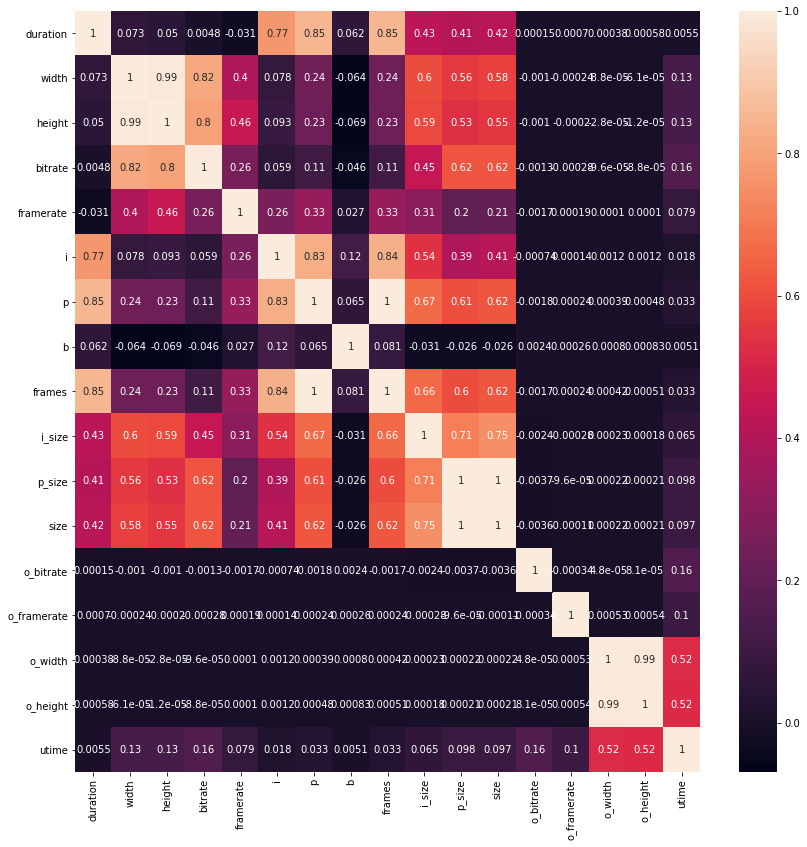

In [ ]:
plt.figure(figsize = (14, 14))
heatmap_video = sns.heatmap(df_video.corr(method = "pearson"), annot = True)
plt.show()

Q2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cf76d0950>,
      dtype=object)

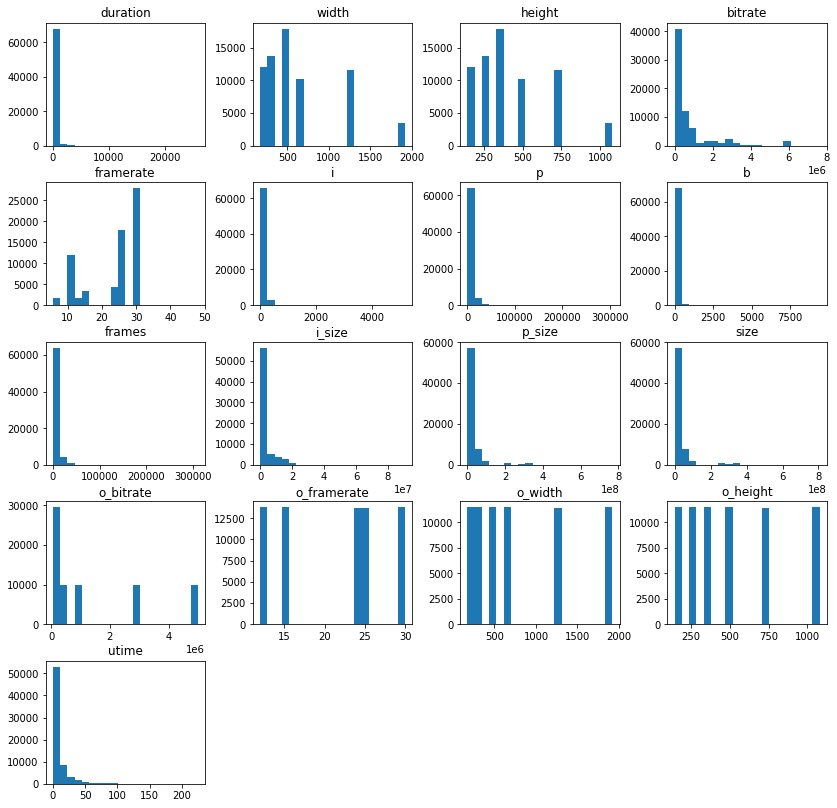

In [4]:
numerical_features_video = ['duration','width',	'height',	'bitrate'	,'framerate','i','p',	'b',	'frames',	'i_size',	'p_size',	'size','o_bitrate', 'o_framerate', 'o_width', 'o_height', 'utime']
df_video.hist(column = numerical_features_video, figsize = (14, 14), grid = False, bins = 20)

Q3

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


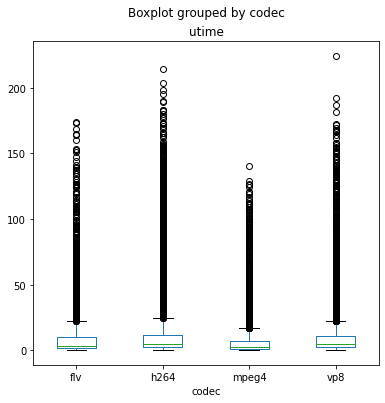

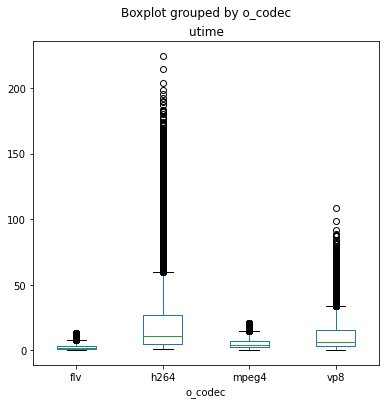

In [5]:
categorical_features_video = ['codec', 'o_codec']
target_variable_video = ['utime']

for feature in categorical_features_video:
  for target in target_variable_video:
    df_video.boxplot(column = target,figsize=(6,6),by = feature, grid = False)

Q6

The mean of transcoding times is: 9.996354820888516
The median of transoding times is: 4.408


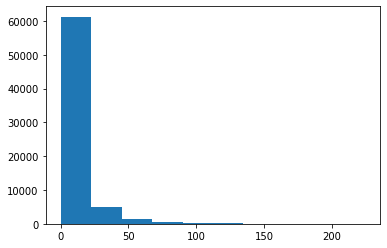

In [6]:
plt.hist(df_video['utime'])
print('The mean of transcoding times is: ' + str(np.mean(df_video['utime'])))
print('The median of transoding times is: ' + str(np.median(df_video['utime'])))

Q7

In [24]:
df_video

,duration,codec,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,utime
0,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.00,176,144,0.612
1,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.00,320,240,0.980
2,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.00,480,360,1.216
3,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.00,640,480,1.692
4,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,mpeg4,56000,12.00,1280,720,3.456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,972.27100,h264,480,360,278822,29.000000,560,28580,0,29140,7324628,26561730,33886358,flv,242000,24.00,640,480,1.552
68780,129.88100,vp8,640,480,639331,30.162790,36,3855,0,3891,875784,9503846,10379630,mpeg4,539000,29.97,1920,1080,18.557
68781,249.68000,vp8,320,240,359345,25.068274,129,6113,0,6242,1758664,9456514,11215178,flv,539000,12.00,176,144,0.752
68782,183.62334,h264,1280,720,2847539,29.000000,98,5405,0,5503,5246294,60113035,65359329,mpeg4,539000,12.00,320,240,5.444


In [25]:
df_video2 = pd.get_dummies(df_video, columns=['codec', 'o_codec'])
df_video2

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,size,o_bitrate,o_framerate,o_width,o_height,utime,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,56000,12.00,176,144,0.612,0,0,1,0,0,0,1,0
1,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,56000,12.00,320,240,0.980,0,0,1,0,0,0,1,0
2,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,56000,12.00,480,360,1.216,0,0,1,0,0,0,1,0
3,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,56000,12.00,640,480,1.692,0,0,1,0,0,0,1,0
4,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,56000,12.00,1280,720,3.456,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,972.27100,480,360,278822,29.000000,560,28580,0,29140,7324628,26561730,33886358,242000,24.00,640,480,1.552,0,1,0,0,1,0,0,0
68780,129.88100,640,480,639331,30.162790,36,3855,0,3891,875784,9503846,10379630,539000,29.97,1920,1080,18.557,0,0,0,1,0,0,1,0
68781,249.68000,320,240,359345,25.068274,129,6113,0,6242,1758664,9456514,11215178,539000,12.00,176,144,0.752,0,0,0,1,1,0,0,0
68782,183.62334,1280,720,2847539,29.000000,98,5405,0,5503,5246294,60113035,65359329,539000,12.00,320,240,5.444,0,1,0,0,0,0,1,0


Q8

In [26]:
df_video3 = df_video2.copy(deep=True)
df_video3.drop('utime',axis=1,inplace=True)
print(list(df_video3.columns))
df_video3

['duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'size', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'codec_flv', 'codec_h264', 'codec_mpeg4', 'codec_vp8', 'o_codec_flv', 'o_codec_h264', 'o_codec_mpeg4', 'o_codec_vp8']


,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,size,o_bitrate,o_framerate,o_width,o_height,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,56000,12.00,176,144,0,0,1,0,0,0,1,0
1,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,56000,12.00,320,240,0,0,1,0,0,0,1,0
2,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,56000,12.00,480,360,0,0,1,0,0,0,1,0
3,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,56000,12.00,640,480,0,0,1,0,0,0,1,0
4,130.35667,176,144,54590,12.000000,27,1537,0,1564,64483,825054,889537,56000,12.00,1280,720,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,972.27100,480,360,278822,29.000000,560,28580,0,29140,7324628,26561730,33886358,242000,24.00,640,480,0,1,0,0,1,0,0,0
68780,129.88100,640,480,639331,30.162790,36,3855,0,3891,875784,9503846,10379630,539000,29.97,1920,1080,0,0,0,1,0,0,1,0
68781,249.68000,320,240,359345,25.068274,129,6113,0,6242,1758664,9456514,11215178,539000,12.00,176,144,0,0,0,1,1,0,0,0
68782,183.62334,1280,720,2847539,29.000000,98,5405,0,5503,5246294,60113035,65359329,539000,12.00,320,240,0,1,0,0,0,0,1,0


In [27]:
df_video4 = StandardScaler().fit_transform(df_video3[['duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'size', 'o_bitrate', 'o_framerate', 'o_width', 'o_height']])
df_video4

array([[-0.54326973, -0.96927335, -1.11619663, ..., -1.37821834,
        -1.02685605, -1.13880323],
       [-0.54326973, -0.96927335, -1.11619663, ..., -1.37821834,
        -0.7907732 , -0.83497513],
       [-0.54326973, -0.96927335, -1.11619663, ..., -1.37821834,
        -0.52845893, -0.45519001],
       ...,
       [-0.12787889, -0.6583695 , -0.71721689, ..., -1.37821834,
        -1.02685605, -1.13880323],
       [-0.3578367 ,  1.41432284,  1.2776818 , ..., -1.37821834,
        -0.7907732 , -0.83497513],
       [ 0.02854399, -0.96927335, -1.11619663, ...,  0.42124515,
        -1.02685605, -1.13880323]])

In [28]:
df_video5 = df_video3.copy(deep=True)
df_video5[['duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'size', 'o_bitrate', 'o_framerate', 'o_width', 'o_height']]=df_video4
df_video5

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,size,o_bitrate,o_framerate,o_width,o_height,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,-0.418960,-0.445729,-0.765453,-1.378218,-1.026856,-1.138803,0,0,1,0,0,0,1,0
1,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,-0.418960,-0.445729,-0.765453,-1.378218,-0.790773,-0.834975,0,0,1,0,0,0,1,0
2,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,-0.418960,-0.445729,-0.765453,-1.378218,-0.528459,-0.455190,0,0,1,0,0,0,1,0
3,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,-0.418960,-0.445729,-0.765453,-1.378218,-0.266145,-0.075405,0,0,1,0,0,0,1,0
4,-0.543270,-0.969273,-1.116197,-0.583333,-1.555936,-0.871457,-0.822060,-0.098879,-0.825201,-0.641488,-0.418960,-0.445729,-0.765453,-1.378218,0.783112,0.684165,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,2.387620,-0.312921,-0.218492,-0.378671,0.797072,5.416577,3.628857,-0.098879,3.656298,1.037117,0.085951,0.163702,-0.659127,0.421245,-0.266145,-0.075405,0,1,0,0,1,0,0,0
68780,-0.544926,0.032528,0.280232,-0.049625,0.958016,-0.765280,-0.440548,-0.098879,-0.447030,-0.453909,-0.248696,-0.270453,-0.489348,1.316478,1.832370,1.823521,0,0,0,1,0,0,1,0
68781,-0.127879,-0.658369,-0.717217,-0.305176,0.252873,0.331882,-0.068911,-0.098879,-0.064958,-0.249780,-0.249625,-0.255021,-0.489348,-1.378218,-1.026856,-1.138803,0,0,0,1,1,0,0,0
68782,-0.357837,1.414323,1.277682,1.965863,0.797072,-0.033839,-0.185438,-0.098879,-0.185057,0.556589,0.744172,0.744989,-0.489348,-1.378218,-0.790773,-0.834975,0,1,0,0,0,0,1,0


Q9

In [11]:
y = df_video2['utime']
print(y)
print(list(df_video3.columns))

0         0.612
1         0.980
2         1.216
3         1.692
4         3.456
          ...  
68779     1.552
68780    18.557
68781     0.752
68782     5.444
68783     3.076
Name: utime, Length: 68784, dtype: float64
['duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'size', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'codec_flv', 'codec_h264', 'codec_mpeg4', 'codec_vp8', 'o_codec_flv', 'o_codec_h264', 'o_codec_mpeg4', 'o_codec_vp8']


In [12]:
len(list(df_video3.columns))

24

In [ ]:
FS, pval = f_regression(df_video3,y)
print(list(FS))
print(sorted([(x,i) for (i,x) in enumerate(list(FS))], reverse=True)[:3])

[2.105398987245995, 1179.829517116466, 1154.4216403206165, 1697.644672121313, 435.6708959426785, 23.521143697016537, 75.90071258286802, 1.816910984793592, 75.5074542195104, 289.2410362278879, 662.1102054975207, 654.6205699213199, 1703.9027851754338, 752.7024732744941, 25950.518894503715, 25444.403221860186, 1.3969598065784785, 194.1653135071609, 451.83970143548555, 10.944269044135822, 5350.16483352774, 12922.464116360788, 2056.537938112341, 122.45106761049385]
[(25950.518894503715, 14), (25444.403221860186, 15), (12922.464116360788, 21)]


In [ ]:
print(list(df_video3.columns)[14])
print(list(df_video3.columns)[15])
print(list(df_video3.columns)[22])

o_width
o_height
o_codec_mpeg4


In [ ]:
print(pval)

[1.46784614e-001 2.21368310e-256 5.95592285e-251 0.00000000e+000
 1.88957451e-096 1.23818001e-006 3.04766532e-018 1.77685850e-001
 3.71849434e-018 9.87480266e-065 2.54151756e-145 1.04343830e-143
 0.00000000e+000 8.05387778e-165 0.00000000e+000 0.00000000e+000
 2.37237348e-001 4.49979502e-044 6.02604103e-100 9.39417432e-004
 0.00000000e+000 0.00000000e+000 0.00000000e+000 1.94354984e-028]


Q10-Q13

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [29]:
x_train = df_video5
y_train = y

grid_standard = GridSearchCV(Pipeline([('model', LinearRegression())]),param_grid={'model': [Ridge(max_iter=1000), Lasso(max_iter=10000)],'model__alpha': [10.0**x for x in np.arange(-3,2)]},cv=10,scoring='neg_root_mean_squared_error',n_jobs=-1,return_train_score=True,verbose=1).fit(df_video5,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.8s finished


In [ ]:
grid_n_standard = GridSearchCV(Pipeline([('model', LinearRegression())]),param_grid={'model': [Ridge(max_iter=1000), Lasso(max_iter=1000)],'model__alpha': [10.0**x for x in np.arange(-3,2)]},cv=10,scoring='neg_root_mean_squared_error',n_jobs=-1,return_train_score=True,verbose=1).fit(df_video3,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4164171.4907879713, tolerance: 1784.569817170224
  positive)


In [ ]:
result1 = pd.DataFrame(grid_n_standard.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model' ]]
result1['Standardize'] =0

result2 = pd.DataFrame(grid_standard.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model']]
result2['Standardize'] = 1

results = pd.concat([result1, result2])
results = results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
results

,mean_test_score,mean_train_score,param_model,Standardize
0,-11.037695,-11.024954,"Lasso(alpha=0.1, copy_X=True, fit_intercept=Tr...",1
1,-11.052017,-11.000246,"Lasso(alpha=0.1, copy_X=True, fit_intercept=Tr...",1
2,-11.054490,-10.997239,"Lasso(alpha=0.1, copy_X=True, fit_intercept=Tr...",1
3,-11.055412,-10.997215,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",1
4,-11.055838,-10.997195,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",1
5,-11.055909,-10.997201,"Lasso(alpha=0.001, copy_X=True, fit_intercept=...",0
6,-11.056076,-10.997175,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",1
7,-11.056641,-10.997452,"Lasso(alpha=0.001, copy_X=True, fit_intercept=...",0
8,-11.057089,-10.997137,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",1
9,-11.058241,-10.997130,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",1


In [ ]:
import statsmodels.api as sm
print(sm.OLS(y_train, sm.add_constant(df_video3)).fit().pvalues)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


const            5.235365e-190
duration          4.709001e-02
width             5.568883e-08
height            9.271988e-09
bitrate          1.456482e-126
framerate         3.292809e-10
i                 8.259887e-08
p                 1.094799e-04
b                 7.069405e-06
frames            2.192189e-04
i_size            4.681481e-01
p_size            3.821872e-01
size              3.846849e-01
o_bitrate         0.000000e+00
o_framerate       0.000000e+00
o_width          5.218535e-130
o_height          1.108057e-03
codec_flv         8.780535e-16
codec_h264        1.467975e-12
codec_mpeg4      3.905647e-129
codec_vp8         5.592198e-30
o_codec_flv       0.000000e+00
o_codec_h264      0.000000e+00
o_codec_mpeg4     0.000000e+00
o_codec_vp8       7.954758e-10
dtype: float64


Q14-Q16

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
grid_poly = GridSearchCV(Pipeline([('poly', PolynomialFeatures()),('standardize', StandardScaler()),('model', Ridge(alpha=0.1))]), param_grid={'poly__degree': np.arange(1,7,1)}, cv=10, n_jobs=1, verbose=1, scoring='neg_root_mean_squared_error', return_train_score=True).fit(SelectKBest(score_func=f_regression, k=10).fit_transform(df_video3, y_train), y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 18.9min finished


In [ ]:
result = pd.DataFrame(grid_poly.cv_results_)[['param_poly__degree','mean_test_score','mean_train_score']]
result

,param_poly__degree,mean_test_score,mean_train_score
0,1,-11.059453,-11.038711
1,2,-6.672095,-6.524858
2,3,-4.759948,-4.386742
3,4,-4.561423,-3.708211
4,5,-5.702094,-3.434984
5,6,-7.256978,-3.309889


Text(0.5, 1.0, 'train vs. degree')

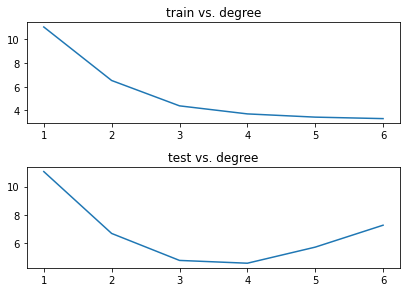

In [ ]:
fig,ax = plt.subplots(2)


ax[1].plot(result['param_poly__degree'],-result['mean_test_score'])
ax[1].set_title('test vs. degree')
fig.tight_layout()
ax[0].plot(result['param_poly__degree'],-result['mean_train_score'])
ax[0].set_title('train vs. degree')

In [ ]:
inv_bitrate= np.divide(np.prod(df_video3[['o_height', 'o_width']], axis=1), df_video3['o_bitrate'])
x_inverse = StandardScaler().fit_transform([inv_bitrate]).reshape(-1,1)
df_inverse = df_video5.copy(deep=True)
df_inverse['bit']=x_inverse

In [ ]:
inv_cv= cross_validate(Ridge(alpha=0.1, max_iter=1000), 
                                   df_inverse, y_train, scoring='neg_root_mean_squared_error', cv=10)

In [ ]:
rmse_inverse_concat = np.mean(-inv_cv['test_score'])
rmse_inverse_concat

11.056075997583076

Q17-Q20

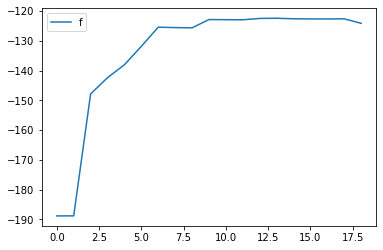

In [ ]:
from sklearn.linear_model import LinearRegression
mutual=[]
fregre=[]
for i in range(1,20):
  fscore_selected = SelectKBest(score_func=f_regression, k=i).fit_transform(x_train, y_train)
  video_f = cross_validate(LinearRegression(), fscore_selected, y_train, scoring=['neg_mean_squared_error'], cv=10)
  rmse_f = video_f['test_neg_mean_squared_error']
  fregre.append(rmse_f.mean())

plt.plot(fregre,label='f')
plt.legend()
best_f=np.argmax(fregre)

In [ ]:
b = best_f
b

13

In [16]:
data_f_selected = SelectKBest(score_func=f_regression, k = 13).fit_transform(x_train, y_train)
video_f = cross_validate(LinearRegression(),data_f_selected,y_train,scoring='neg_root_mean_squared_error', 
                            return_train_score=True, cv=10)
linear_video=cross_validate(LinearRegression(),x_train,y_train,scoring='neg_root_mean_squared_error', 
                            return_train_score=True, cv=10)

In [17]:
linear_video['test_score'].mean()

-1419078811.3284357

In [ ]:
video_f['test_score'].mean()

-11.041940211498174

In [ ]:
top10 = np.argsort(best_f)[::-1][:10]
top10

array([0])

In [ ]:
from sklearn.neural_network import MLPRegressor
alpha = 10.**np.arange(-3, -1)

grid_nn = GridSearchCV(MLPRegressor(solver='adam',max_iter=5000,beta_1 = 0.9,beta_2 = 0.99), param_grid={'hidden_layer_sizes':[(32,32,32),(64,64,64)],'activation':['identity', 'relu'],'alpha': alpha}, cv=10, n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error', return_train_score=True).fit(data_f_selected, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 59.1min finished


In [ ]:
alpha = 10.**np.arange(-7, 2)
alpha.shape

(9,)

In [ ]:
nn_results = pd.DataFrame(grid_nn.cv_results_)[['param_alpha','param_activation','param_hidden_layer_sizes','mean_test_score','mean_train_score']]
nn_results=nn_results.sort_values(by=['mean_test_score'],ascending=False)
nn_results.head()

,param_alpha,param_activation,param_hidden_layer_sizes,mean_test_score,mean_train_score
4,0.001,relu,"(32, 32, 32)",-4.704740,-2.625139
6,0.01,relu,"(32, 32, 32)",-4.763165,-2.617754
5,0.001,relu,"(64, 64, 64)",-5.142316,-1.875029
7,0.01,relu,"(64, 64, 64)",-5.642840,-1.798004
1,0.001,identity,"(64, 64, 64)",-11.009360,-11.029723


Q21-Q23

In [ ]:
from sklearn.ensemble import RandomForestRegressor
pipe_rfr = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor())
])

param_grid_rfr = {
    'model__max_features': np.arange(1,18,2),

}

grid_num_features = GridSearchCV(pipe_rfr, param_grid=param_grid_rfr, cv=10, n_jobs=-1, verbose=1, 
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True).fit(x_train, y_train)

rf_feature_results = pd.DataFrame(grid_num_features.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__max_features']]
rf_feature_results=rf_feature_results.sort_values(by=['mean_test_score'],ascending=False).reset_index(drop=True)
rf_feature_results.head()

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 10.1min finished


,mean_test_score,mean_train_score,param_model__max_features
0,-4.013413,-0.544693,5
1,-4.013652,-0.500264,7
2,-4.050132,-0.482067,9
3,-4.068356,-0.473912,11
4,-4.081914,-0.472561,13


In [ ]:
rf_feature_results=rf_feature_results.sort_values(by=['mean_test_score'],ascending=False).reset_index(drop=True)
rf_feature_results.head()

,mean_test_score,mean_train_score,param_model__max_features
0,-4.013413,-0.544693,5
1,-4.013652,-0.500264,7
2,-4.050132,-0.482067,9
3,-4.068356,-0.473912,11
4,-4.081914,-0.472561,13


In [ ]:
max_feature = rf_feature_results['param_model__max_features'][0]
max_feature

5

In [ ]:
pipe_rfr = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor(max_features=max_feature))
])

param_grid_rfr = {

    'model__n_estimators': np.arange(10, 210, 10),
    
}

grid_num_estimator = GridSearchCV(pipe_rfr, param_grid=param_grid_rfr, cv=10, n_jobs=-1, verbose=1, 
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True).fit(x_train, y_train)

rf_estimator_results = pd.DataFrame(grid_num_estimator.cv_results_)[['mean_test_score','param_model__n_estimators']]
rf_estimator_results=rf_depth_estimators.sort_values(by=['mean_test_score'],ascending=False).reset_index(drop=True)


In [ ]:
rf_estimator_results=rf_estimator_results.sort_values(by=['mean_test_score'],ascending=False).reset_index(drop=True)

In [ ]:
max_estimator = rf_estimator_results['param_model__n_estimators'][0]
max_estimator

190

In [ ]:
pipe_rfr = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor(max_features=max_feature,n_estimators=max_estimator))
])

param_grid_rfr = {

    'model__max_depth': np.arange(2, 26, 1)
}

grid_num_depth = GridSearchCV(pipe_rfr, param_grid=param_grid_rfr, cv=10, n_jobs=-1, verbose=1, 
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True).fit(x_train, y_train)

rf_depth_results = pd.DataFrame(grid_num_depth.cv_results_)[['mean_test_score', 'mean_train_score','param_model__max_depth']]
rf_depth_results=rf_depth_results.sort_values(by=['mean_test_score'],ascending=False)
rf_depth_results.head()

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 22.8min finished


,mean_test_score,mean_train_score,param_model__max_depth
19,-3.998347,-0.559323,21
23,-4.014247,-0.529636,25
20,-4.018708,-0.540432,22
22,-4.027311,-0.528356,24
17,-4.032723,-0.641261,19


In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_viz = RandomForestRegressor(n_estimators=190, max_features=5, max_depth=4, oob_score=True)
rf_viz.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=190, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

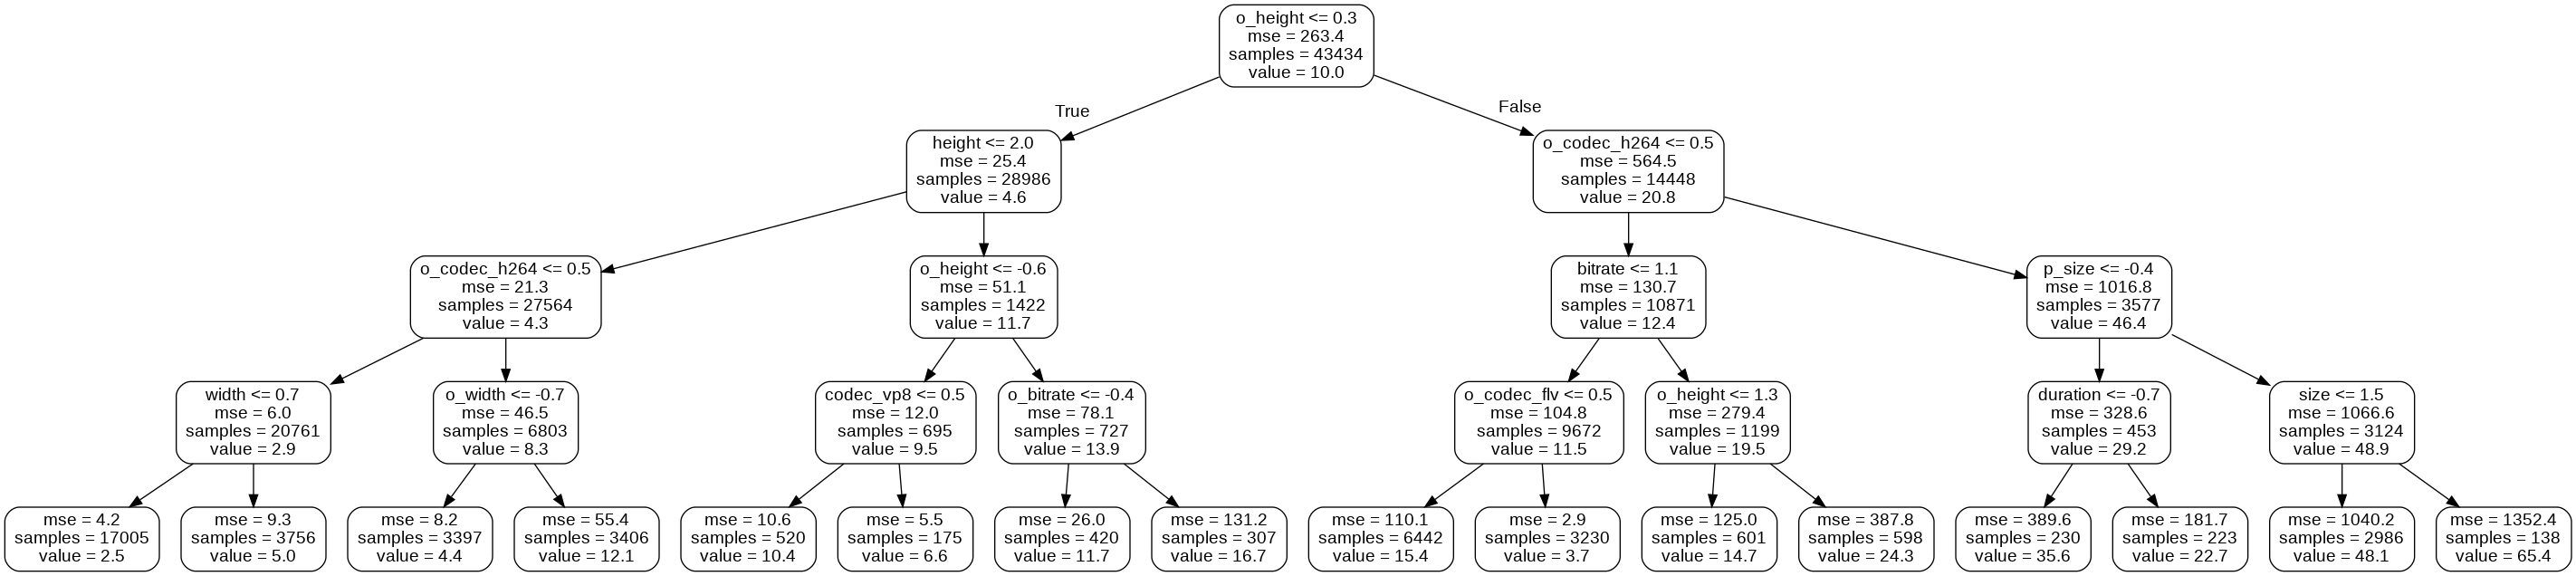

In [34]:
tree = rf_viz.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = x_train.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [ ]:
while True:pass

In [31]:
from sklearn.ensemble import RandomForestRegressor
clf= RandomForestRegressor(n_estimators=190,max_features=5,max_depth=21,oob_score=True).fit(x_train,y_train)

In [32]:
r_2,oob= clf.score(x_train, y_train),clf.oob_score_
r_2,oob

(0.9988200855497541, 0.9922150918129832)